### Import packages

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from classifiers import *
from FeatureSelection import *

### Import data

In [2]:
try:
    data = np.load("../Data/vectorized_data.npz")
except:
    os.system("python clean_data.py")
    data = np.load("../Data/vectorized_data")
    
train_tfidf,train_labels = data['arr_0'], data['arr_1']
test_tfidf,test_labels = data['arr_2'], data['arr_3']

### View shapes

In [3]:
print ("Training data")
print (train_tfidf.shape)
print (train_labels.shape)

Training data
(2343, 68545)
(2343,)


In [4]:
print ("Test data")
print (test_tfidf.shape)
print (test_labels.shape)

Test data
(1560, 68545)
(1560,)


## Classification

### 1. KNN

#### 1.1. K = 50, NPC = 2343

In [5]:
PC = PrincipalComponents(train_tfidf)

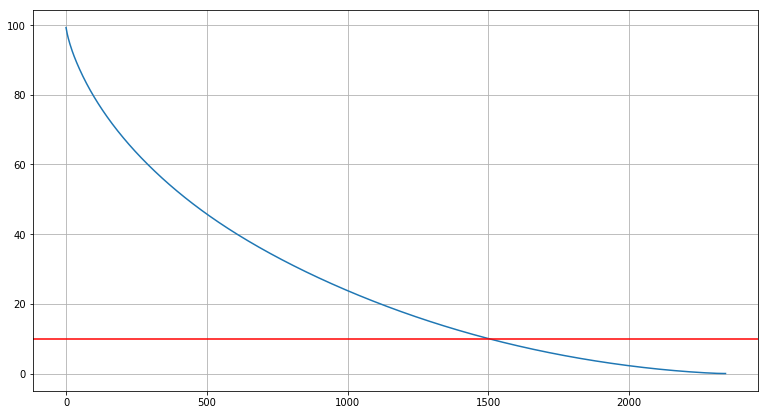

In [19]:
plt.figure(figsize=(13,7))
plt.plot(100- np.cumsum(PC.explained_variance_ratio_)*100)
plt.axhline(y = 10,color = 'r')
plt.grid()
plt.show()

In [7]:
train_PC = PC.transform(train_tfidf)[:,:]
test_PC = PC.transform(test_tfidf)[:,:]

In [27]:
classifier = KNN_classifier(param = 50)
classifier.train(train_PC,train_labels)

In [28]:
predict_test = classifier.predict(test_PC)

In [29]:
predict_test.shape

(1560,)

In [30]:
print (classification_report(test_labels,predict_test))
print ("Confusion Matrix:\n{}".format(confusion_matrix(test_labels,predict_test)))
print ("Accuracy:{}".format(np.average(test_labels == predict_test)))

                          precision    recall  f1-score   support

           comp.graphics       0.83      0.83      0.83       389
 comp.os.ms-windows.misc       0.76      0.77      0.77       394
comp.sys.ibm.pc.hardware       0.70      0.71      0.71       392
   comp.sys.mac.hardware       0.77      0.75      0.76       385

               micro avg       0.77      0.77      0.77      1560
               macro avg       0.77      0.77      0.77      1560
            weighted avg       0.77      0.77      0.77      1560

Confusion Matrix:
[[322  26  25  16]
 [ 32 304  37  21]
 [ 19  43 280  50]
 [ 13  26  58 288]]
Accuracy:0.7653846153846153


### 2. SVM

#### 1.1. C = 5, NPC = 2343

In [45]:
classifier = SVM(C = 10)
classifier.train(train_PC,train_labels)

In [46]:
predict_test = classifier.predict(test_PC)

In [47]:
predict_test.shape

(1560,)

In [48]:
print (classification_report(test_labels,predict_test))
print ("Confusion Matrix:\n{}".format(confusion_matrix(test_labels,predict_test)))
print ("Accuracy:{}".format(np.average(test_labels == predict_test)))

                          precision    recall  f1-score   support

           comp.graphics       0.00      0.00      0.00       389
 comp.os.ms-windows.misc       0.00      0.00      0.00       394
comp.sys.ibm.pc.hardware       0.25      1.00      0.40       392
   comp.sys.mac.hardware       0.00      0.00      0.00       385

               micro avg       0.25      0.25      0.25      1560
               macro avg       0.06      0.25      0.10      1560
            weighted avg       0.06      0.25      0.10      1560

Confusion Matrix:
[[  0   0 389   0]
 [  0   0 394   0]
 [  0   0 392   0]
 [  0   0 385   0]]
Accuracy:0.2512820512820513


C:\Users\Associate\Anaconda3\envs\text_cla\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
predict_test

array(['comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware',
       'comp.sys.ibm.pc.hardware', ..., 'comp.sys.ibm.pc.hardware',
       'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware'],
      dtype='<U24')